## Simple Model

### let's do SLR for simple modeling

In [49]:
import pandas as pd, numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path

pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

In [33]:
# load data
path = '/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/clean_full_collisions.csv'
df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0', 'VEHICLES COMBINED', 'VEHICLE CLEAN'])
df

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,month,season,is_electric,total_injury_death,total_injury_death_flag
0,2022-01-01,7,NaN,NaN,40.7715,-73.9182,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,NaN,...,Sedan,NaN,NaN,NaN,NaN,1,Winter,0,0,0
1,2022-01-01,4,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,Sedan,Sedan,NaN,NaN,NaN,1,Winter,0,0,0
2,2022-01-01,7,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,Sedan,NaN,NaN,NaN,NaN,1,Winter,0,0,0
3,2022-01-01,5,NaN,NaN,40.7469,-73.8487,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,NaN,...,Sedan,Sedan,NaN,NaN,NaN,1,Winter,0,2,1
4,2022-01-01,1,NaN,NaN,40.8192,-73.9604,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,NaN,...,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1,Winter,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,2025-12-02,10,BRONX,"10,475.0000",40.8847,-73.8313,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,NaN,...,Sedan,NaN,NaN,NaN,NaN,12,Winter,0,2,1
369997,2025-12-02,19,BRONX,"10,451.0000",40.8147,-73.9221,"(40.814716, -73.92207)",NaN,NaN,328 E 145 ST,...,Sedan,Sedan,NaN,NaN,NaN,12,Winter,0,0,0
369998,2025-12-02,20,BROOKLYN,"11,219.0000",40.6390,-74.0004,"(40.639004, -74.0004)",NaN,NaN,948 50 ST,...,Sedan,NaN,NaN,NaN,NaN,12,Winter,0,2,1
369999,2025-12-02,5,NaN,NaN,40.7100,-73.9893,"(40.70996, -73.989334)",FDR DRIVE,NaN,NaN,...,Sedan,NaN,NaN,NaN,NaN,12,Winter,0,2,1


In [34]:
# Removes rows with only 1 injured person. ONLY USE IF STRATIFY IS NEEDED FOR BETTER MODEL
#df_filtered = df[(df['number_of_persons_injured'] < 20) & (df['number_of_persons_injured']!=18)]
#df_filtered

In [35]:
# getting our dummies before train-test split
df_enc = pd.get_dummies(df, columns=['season'], drop_first=True)
# baseline of Fall

df_enc

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,month,is_electric,total_injury_death,total_injury_death_flag,season_Spring,season_Summer,season_Winter
0,2022-01-01,7,NaN,NaN,40.7715,-73.9182,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,False,False,True
1,2022-01-01,4,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,NaN,NaN,NaN,1,0,0,0,False,False,True
2,2022-01-01,7,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,1,0,0,0,False,False,True
3,2022-01-01,5,NaN,NaN,40.7469,-73.8487,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,1,0,2,1,False,False,True
4,2022-01-01,1,NaN,NaN,40.8192,-73.9604,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,2025-12-02,10,BRONX,"10,475.0000",40.8847,-73.8313,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,NaN,...,NaN,NaN,NaN,12,0,2,1,False,False,True
369997,2025-12-02,19,BRONX,"10,451.0000",40.8147,-73.9221,"(40.814716, -73.92207)",NaN,NaN,328 E 145 ST,...,NaN,NaN,NaN,12,0,0,0,False,False,True
369998,2025-12-02,20,BROOKLYN,"11,219.0000",40.6390,-74.0004,"(40.639004, -74.0004)",NaN,NaN,948 50 ST,...,NaN,NaN,NaN,12,0,2,1,False,False,True
369999,2025-12-02,5,NaN,NaN,40.7100,-73.9893,"(40.70996, -73.989334)",FDR DRIVE,NaN,NaN,...,NaN,NaN,NaN,12,0,2,1,False,False,True


In [36]:
# feature engineering our interaction term
season_cols = ['season_Spring', 'season_Summer', 'season_Winter']
for x in season_cols:
    df_enc[f'interaction_is_electric_{x}'] = df_enc['is_electric'] * df_enc[x]

df_enc

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,month,is_electric,total_injury_death,total_injury_death_flag,season_Spring,season_Summer,season_Winter,interaction_is_electric_season_Spring,interaction_is_electric_season_Summer,interaction_is_electric_season_Winter
0,2022-01-01,7,NaN,NaN,40.7715,-73.9182,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,NaN,...,1,0,0,0,False,False,True,0,0,0
1,2022-01-01,4,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,1,0,0,0,False,False,True,0,0,0
2,2022-01-01,7,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,1,0,0,0,False,False,True,0,0,0
3,2022-01-01,5,NaN,NaN,40.7469,-73.8487,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,NaN,...,1,0,2,1,False,False,True,0,0,0
4,2022-01-01,1,NaN,NaN,40.8192,-73.9604,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,NaN,...,1,0,0,0,False,False,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,2025-12-02,10,BRONX,"10,475.0000",40.8847,-73.8313,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,NaN,...,12,0,2,1,False,False,True,0,0,0
369997,2025-12-02,19,BRONX,"10,451.0000",40.8147,-73.9221,"(40.814716, -73.92207)",NaN,NaN,328 E 145 ST,...,12,0,0,0,False,False,True,0,0,0
369998,2025-12-02,20,BROOKLYN,"11,219.0000",40.6390,-74.0004,"(40.639004, -74.0004)",NaN,NaN,948 50 ST,...,12,0,2,1,False,False,True,0,0,0
369999,2025-12-02,5,NaN,NaN,40.7100,-73.9893,"(40.70996, -73.989334)",FDR DRIVE,NaN,NaN,...,12,0,2,1,False,False,True,0,0,0


In [37]:
y = df_enc['total_injury_death_flag']

X = sm.add_constant((df_enc.iloc[:,[30,33,34,35,36,37,38]].astype(int)))
display(y)
display(X)

0         0
1         0
2         0
3         1
4         0
         ..
369996    1
369997    0
369998    1
369999    1
370000    1
Name: total_injury_death_flag, Length: 370001, dtype: int64

,const,is_electric,season_Spring,season_Summer,season_Winter,interaction_is_electric_season_Spring,interaction_is_electric_season_Summer,interaction_is_electric_season_Winter
0,1.0000,0,0,0,1,0,0,0
1,1.0000,0,0,0,1,0,0,0
2,1.0000,0,0,0,1,0,0,0
3,1.0000,0,0,0,1,0,0,0
4,1.0000,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
369996,1.0000,0,0,0,1,0,0,0
369997,1.0000,0,0,0,1,0,0,0
369998,1.0000,0,0,0,1,0,0,0
369999,1.0000,0,0,0,1,0,0,0


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,  random_state=42)

In [39]:
# 1. Baseline Model

# using the mean of the entire y as our prediction
y_base_pred = y_train.mean()

# filling in the mean with the same size
y_base_train = np.full_like(y_test, y_base_pred)

# calculating error
mae_base = mean_absolute_error(y_test, y_base_train)
rmse_base = np.sqrt(mean_squared_error(y_test, y_base_train))

print(f"MAE: {mae_base:.2f} ———— RMSE: {rmse_base:.2f}")

MAE: 0.42 ———— RMSE: 0.65


In [44]:
# 2. Simple Model
model = LogisticRegression().fit(x_train, y_train)

pred_simple = model.predict(x_test)

mae_simple = mean_absolute_error(y_test, pred_simple)
rmse_simple = mean_squared_error(y_test, pred_simple)

print(f"MAE: {mae_simple:.2f} ———— RMSE: {rmse_simple:.2f}")

# our error is smaller than our baseline :)

MAE: 0.39 ———— RMSE: 0.39


In [56]:
print(f"Simple Model Accuracy: {accuracy_score(y_test, (pred_simple >= 0.5).astype(int))}")

Simple Model Accuracy: 0.6077783083035287


In [47]:
# coefficient + intercept for Simple Model
coef1 = model.coef_[0][0]
intercept1 = model.intercept_[0]

print(f"Intercept (Log-Odds): {intercept1:.4f}")
print(f"Coefficient (Log-Odds): {coef1:.4f}")

Intercept (Log-Odds): -0.1627
Coefficient (Log-Odds): -0.1594


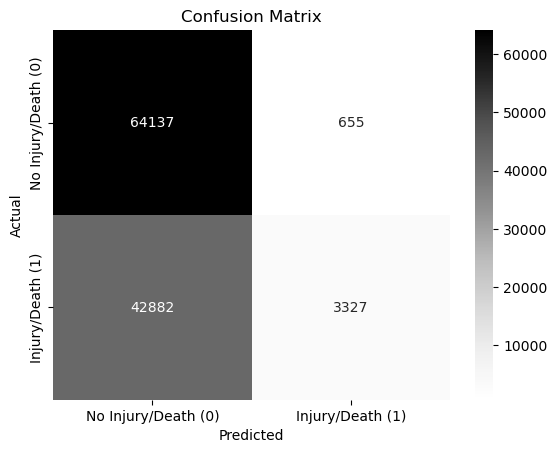

                     precision    recall  f1-score   support

No Injury/Death (0)       0.60      0.99      0.75     64792
   Injury/Death (1)       0.84      0.07      0.13     46209

           accuracy                           0.61    111001
          macro avg       0.72      0.53      0.44    111001
       weighted avg       0.70      0.61      0.49    111001



In [59]:
# confusion matrix
cm = confusion_matrix(y_test, pred_simple)

# visualizing with heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
            xticklabels=['No Injury/Death (0)', 'Injury/Death (1)'],
            yticklabels=['No Injury/Death (0)', 'Injury/Death (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# report
print(classification_report(y_test, pred_simple, target_names=['No Injury/Death (0)', 'Injury/Death (1)']))

